In [45]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re

In [46]:
df = pd.read_csv("../data/Results.csv")

Change Yes/No to 1 and 0

In [47]:
df.Fastest = df.Fastest.map(dict(Yes=1, No=0))
df.Cheapest = df.Cheapest.map(dict(Yes=1, No=0))
df.Comfortable = df.Comfortable.map(dict(Yes=1, No=0))
df.OnlyOption = df.OnlyOption.map(dict(Yes=1, No=0))
df.Environmental = df.Environmental.map(dict(Yes=1, No=0))
df.Healthiest = df.Healthiest.map(dict(Yes=1, No=0))
df.OtherTrips = df.OtherTrips.map(dict(Yes=1, No=0))

Change NaN to Empty String

In [48]:
df = df.replace(np.nan, "")

Shorten Center Names

In [49]:
df.Center = df.Center.str.replace(r"[\w\s,]*\((.*)\)",r"\1")

C:\Users\joanv\AppData\Local\Temp\ipykernel_1964\2345579929.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Center = df.Center.str.replace(r"[\w\s,]*\((.*)\)",r"\1")


Data Visualization

In [50]:
df[df["Center"] == "Barcelona School of Informatics (FIB)"]["GoStage1"].unique()

array([], dtype=object)

In [51]:
pt = df.pivot_table(index="Center", columns="GoStage1", aggfunc="count", fill_value=0)["Answer"]
pt

GoStage1,,Bicycle,Bus,Combustion or electric motorcycle with non-renewable source charging,"Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),",Electric motorcycle,Electric vehicle (with Zero label and renewable source charging),FGC,On foot,Renfe,Scooter (or other micro-mobility devices) with non-renewable charging,Scooter (or other micro-mobility devices) with renewable charging,Taxi,Tram,Underground
Center,,,,,,,,,,,,,,,
EEABB,5,3,6,3,9,0,0,1,20,6,0,2,0,0,5
EEBE,6,12,19,13,12,0,0,3,56,16,2,0,1,3,18
EETAC,3,0,14,2,9,0,2,1,26,6,0,0,0,1,5
EPSEB,8,1,11,4,4,0,0,0,21,4,0,0,0,0,10
EPSEM,5,0,4,3,22,0,1,1,24,1,0,0,0,0,0
EPSEVG,6,1,4,3,6,0,1,0,29,5,0,0,0,0,1
ESEIAAT,7,2,11,7,46,1,2,4,92,6,0,1,1,0,3
ETSAB,6,6,11,7,5,0,1,4,53,3,0,1,0,3,15
ETSAV,2,1,3,4,11,0,1,1,15,0,1,1,0,0,6


<AxesSubplot:xlabel='GoStage1', ylabel='Center'>

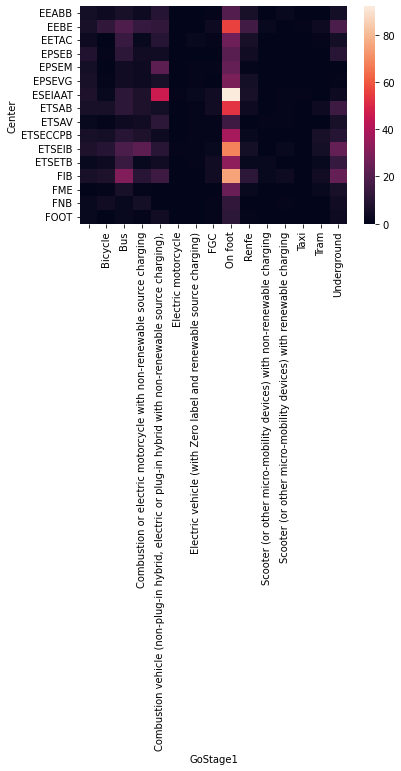

In [52]:
sns.heatmap(pt)

In [59]:
df

,Unnamed: 0,Answer,Gender,Center,Year,Days,ZipCode,GoStage1,GoStage2,GoStage3,...,BackStage3,Fastest,Cheapest,Comfortable,OnlyOption,Environmental,Healthiest,OtherTrips,Other,GoStage
0,0,11,Man,ESEIAAT,Third,5,8302.0,5,1,2,...,,0,0,0,1,0,0,0,,1
1,1,12,Woman,ETSAB,First,3,8290.0,3,3,3,...,,0,0,0,0,0,0,1,,3
2,2,16,Man,ETSEIB,First,5,8397.0,6,7,4,...,,0,1,0,0,1,0,0,,4
3,3,31,Man,EPSEM,Second,4,8243.0,2,2,2,...,,1,0,0,0,1,0,0,,2
4,4,36,Woman,ETSAB,Fourth,2,8401.0,7,4,100,...,,0,0,0,1,0,0,0,,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1443,2963,NR/DK,FIB,Fourth,3,8041.0,4,4,100,...,,1,1,0,0,0,0,0,,4
1444,1444,2964,Woman,EPSEB,Fourth,4,8912.0,4,7,3,...,,0,0,0,0,0,0,0,Because I can't enter Barcelona with my car be...,3
1445,1445,2965,Woman,FME,First,5,8023.0,4,100,100,...,,1,0,1,0,0,0,0,,4
1446,1446,2966,Woman,FOOT,Third,5,8015.0,4,7,2,...,,1,1,0,0,0,0,0,,2


In [54]:
changes = {
    "FGC" : 1 ,
    "On foot" : 2 ,
    "Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging)," : 3 ,
    "Underground" : 4 ,
    "Bus" : 5 ,
    "Combustion or electric motorcycle with non-renewable source charging" : 6 ,
    "Renfe" : 7 ,
    "Tram" : 8 ,
    "Bicycle" : 9 ,
    "Taxi" : 10 ,
    "Electric motorcycle" : 11 ,
    "Scooter (or other micro-mobility devices) with renewable charging" : 12 ,
    "Scooter (or other micro-mobility devices) with non-renewable charging" : 13 ,
    "Electric vehicle (with Zero label and renewable source charging)" : 14 ,
    "" : 100 ,
}
changes

{'FGC': 1,
 'On foot': 2,
 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),': 3,
 'Underground': 4,
 'Bus': 5,
 'Combustion or electric motorcycle with non-renewable source charging': 6,
 'Renfe': 7,
 'Tram': 8,
 'Bicycle': 9,
 'Taxi': 10,
 'Electric motorcycle': 11,
 'Scooter (or other micro-mobility devices) with renewable charging': 12,
 'Scooter (or other micro-mobility devices) with non-renewable charging': 13,
 'Electric vehicle (with Zero label and renewable source charging)': 14,
 '': 100}

In [55]:
df[["GoStage1","GoStage2","GoStage3"] ] = df[["GoStage1","GoStage2","GoStage3"] ].replace(changes)

In [58]:
df["GoStage"] = df[["GoStage1","GoStage2","GoStage3"] ].min( axis = 1)

In [61]:
changes_back = {
    1 : "FGC" ,
    2 : "On foot" ,
    3 : "Combustion vehicle " ,
    4 : "Underground" ,
    5 : "Bus" ,
    6 : "Motorcycle with non-renewable source charging" ,
    7 : "Renfe" ,
    8 : "Tram" ,
    9 : "Bicycle" ,
    10 : "Taxi" ,
    11 : "Electric motorcycle" ,
    12 : "Scooter with renewable charging" ,
    13 : "Scooter with non-renewable charging" ,
    14 : "Electric vehicle " ,
    100 : "" ,
}
changes_back

{1: 'FGC',
 2: 'On foot',
 3: 'Combustion vehicle ',
 4: 'Underground',
 5: 'Bus',
 6: 'Motorcycle with non-renewable source charging',
 7: 'Renfe',
 8: 'Tram',
 9: 'Bicycle',
 10: 'Taxi',
 11: 'Electric motorcycle',
 12: 'Scooter with renewable charging',
 13: 'Scooter with non-renewable charging',
 14: 'Electric vehicle ',
 100: ''}

In [62]:
df["GoStage"] = df["GoStage"].replace( changes_back)

In [68]:
df.drop( ["GoStage1","GoStage2","GoStage3" ] , axis = 1 )

,Unnamed: 0,Answer,Gender,Center,Year,Days,ZipCode,SameBack,BackStage1,BackStage2,BackStage3,Fastest,Cheapest,Comfortable,OnlyOption,Environmental,Healthiest,OtherTrips,Other,GoStage
0,0,11,Man,ESEIAAT,Third,5,8302.0,No,"Combustion vehicle (non-plug-in hybrid, electr...",,,0,0,0,1,0,0,0,,FGC
1,1,12,Woman,ETSAB,First,3,8290.0,Yes,,,,0,0,0,0,0,0,1,,Combustion vehicle
2,2,16,Man,ETSEIB,First,5,8397.0,Yes,,,,0,1,0,0,1,0,0,,Underground
3,3,31,Man,EPSEM,Second,4,8243.0,Yes,,,,1,0,0,0,1,0,0,,On foot
4,4,36,Woman,ETSAB,Fourth,2,8401.0,Yes,,,,0,0,0,1,0,0,0,,Underground
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1443,2963,NR/DK,FIB,Fourth,3,8041.0,Yes,,,,1,1,0,0,0,0,0,,Underground
1444,1444,2964,Woman,EPSEB,Fourth,4,8912.0,Yes,,,,0,0,0,0,0,0,0,Because I can't enter Barcelona with my car be...,Combustion vehicle
1445,1445,2965,Woman,FME,First,5,8023.0,Yes,,,,1,0,1,0,0,0,0,,Underground
1446,1446,2966,Woman,FOOT,Third,5,8015.0,Yes,,,,1,1,0,0,0,0,0,,On foot


In [ ]:
df